In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 导入数据  大致观察一下分布

In [2]:
import pickle, os

orig_train_dump_path = 'data/cache/orig_data_train.pkl'
def load_data():
    if os.path.exists(orig_train_dump_path):
        data_train = pickle.load(open(orig_train_dump_path,'rb'))
    else:
        data_train = pd.read_table("data/zhengqi_train.txt")
        pickle.dump(data_train, open(orig_train_dump_path,'wb'))
    return data_train

In [4]:
orig_data_train = load_data()
print("训练集大小",orig_data_train.shape)
orig_data_train.head()

训练集大小 (2888, 39)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [6]:
orig_data_train.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [7]:
# 将训练集 分成 训练集 和 验证集 并保存称为 pickle 文件
from sklearn.model_selection import train_test_split
dump_path = 'data/cache/'
def get_train_val_split(data_train):
    if os.path.exists(dump_path+'X_train.pkl') and \
    os.path.exists(dump_path+'X_val.pkl') and \
    os.path.exists(dump_path+'y_train.pkl') and \
    os.path.exists(dump_path+'y_val.pkl'):
        X_train = pickle.load(open(dump_path+'X_train.pkl', 'rb'))
        X_val = pickle.load(open(dump_path+'X_val.pkl','rb'))
        y_train = pickle.load(open(dump_path+'y_train.pkl','rb'))
        y_val = pickle.load(open(dump_path+'y_val.pkl', 'rb'))
    else:
        X = data_train.drop('target', axis=1)
        y = data_train['target']
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)
        pickle.dump(X_train, open(dump_path+'X_train.pkl', 'wb'))
        pickle.dump(X_val, open(dump_path+'X_val.pkl', 'wb'))
        pickle.dump(y_train, open(dump_path+'y_train.pkl', 'wb'))
        pickle.dump(y_val, open(dump_path+'y_val.pkl', 'wb'))
        
    return X_train, X_val, y_train, y_val

In [8]:
X_train,X_val, y_train, y_val = get_train_val_split(orig_data_train)

In [9]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
len(y_train.values)

(2310, 38)
(578, 38)
(2310,)
(578,)


2310

In [10]:
# 使用 standardScaler fit测试集上的分布
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
ss.mean_

array([ 0.11813247,  0.04887662,  0.29494892, -0.0713961 ,  0.00807532,
       -0.55641558,  0.19106017,  0.12976797,  0.17762857, -0.16165281,
        0.05085022, -0.35902424,  0.01831645,  0.19914632,  0.02675628,
        0.09555065,  0.12072641, -0.03901905,  0.05358052, -0.11779957,
       -0.19435974, -0.05114545,  0.30882987,  0.15198485, -0.02976926,
       -0.05255671,  0.07225498,  0.27234848,  0.14011212,  0.0954303 ,
        0.04125152,  0.12985887,  0.01269394,  0.00291212,  0.00726061,
        0.1997645 ,  0.04278355, -0.1311303 ])

In [12]:
# 原始的features_list
feature_list = list(orig_data_train.columns)[:-1]

In [22]:
# 特征两两相乘 获得新特征
def feature_eng(data):
    #if os.path.exists(dump_path+ str(data))
    index = data.index
    columns = data.columns
    data = pd.DataFrame(ss.transform(data), index= index ,columns= columns)
    for col1 in range(len(feature_list)):
        for col2 in range(col1,len(feature_list)):
            print()
            temp = feature_list[col1] + '*' + feature_list[col2]
            data[temp] = data[feature_list[col1]] * data[feature_list[col2]]
    return data

In [121]:
X_train_after_fea = feature_eng(X_train)

In [30]:
X_val_after_fea = feature_eng(X_val)

In [31]:
X_val_after_fea.head()
#X_val_after_fea = pickle.dump(X_val_after_fea,open(dump_path+'X_val_featured.pkl','wb'))

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V34*V34,V34*V35,V34*V36,V34*V37,V35*V35,V35*V36,V35*V37,V36*V36,V36*V37,V37*V37
1851,-0.153864,-0.266655,-0.403556,-0.293272,0.171631,0.450967,0.009863,-0.076026,-0.628578,0.217989,...,0.023059,0.025706,0.035555,0.013838,0.028656,0.039635,0.015427,0.054821,0.021337,0.008305
757,-0.143114,-0.207370,0.520883,1.366090,0.264178,-2.228539,1.115314,1.193053,0.111287,0.679331,...,20.794844,0.005807,2.858052,-2.101122,0.000002,0.000798,-0.000587,0.392812,-0.288779,0.212299
620,-0.175364,0.166343,0.052029,1.410713,0.206196,-0.240833,0.074954,0.290503,-0.191899,0.217989,...,0.001641,0.026686,0.032731,0.027273,0.434116,0.532443,0.443656,0.653041,0.544144,0.453406
2691,0.266452,0.424659,-0.695485,-1.228285,0.515059,0.645840,0.028618,-0.231748,0.127125,0.217989,...,0.023059,0.025706,0.025384,0.102994,0.028656,0.028297,0.114814,0.027942,0.113375,0.460018
301,-0.734352,-0.743059,-0.378123,-0.177044,-0.090401,0.028092,0.530594,0.364656,-0.321998,0.217989,...,0.087342,-0.194722,-0.575648,-0.460140,0.434116,1.283360,1.025844,3.793949,3.032663,2.424136


In [124]:
# 将新特征数据保存
pickle.dump(X_train_after_fea, open(dump_path+'X_train_featured.pkl','wb'))

In [13]:
X_train_after_fea = pickle.load(open(dump_path+'X_train_featured.pkl','rb'))

In [14]:
X_train.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,...,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,0.118132,0.048877,0.294949,-0.071396,0.008075,-0.556416,0.191060,0.129768,0.177629,-0.161653,...,0.140112,0.095430,0.041252,0.129859,0.012694,0.002912,0.007261,0.199765,0.042784,-0.131130
std,0.930453,0.944782,0.904528,0.963832,0.897032,0.513266,0.906614,0.944196,0.884137,0.934435,...,0.938684,1.062411,0.911367,0.857011,0.918760,1.014479,1.006052,0.970403,0.970644,1.022166
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.120000,-4.576000,-5.048000,-4.692000,-8.580000,...,-2.435000,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000
25%,-0.292000,-0.228750,-0.293750,-0.655750,-0.376750,-0.849750,-0.307750,-0.284750,-0.158750,-0.390000,...,-0.455000,-0.664750,-0.286750,-0.184500,-0.422750,-0.499000,-0.290000,-0.223000,-0.407750,-0.798750
50%,0.357000,0.265000,0.379000,-0.048000,0.105500,-0.468500,0.391000,0.345000,0.359000,0.042000,...,-0.447000,-0.038000,0.044500,0.295000,0.036000,-0.040000,0.160000,0.364000,0.151000,-0.172000
75%,0.724000,0.595750,0.916750,0.626750,0.543750,-0.154000,0.836000,0.790000,0.717000,0.042000,...,0.729000,0.746750,0.466750,0.632750,0.549750,0.464500,0.273000,0.602000,0.653000,0.489500
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.867000,1.918000,2.245000,1.335000,...,4.671000,4.426000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,2.938000


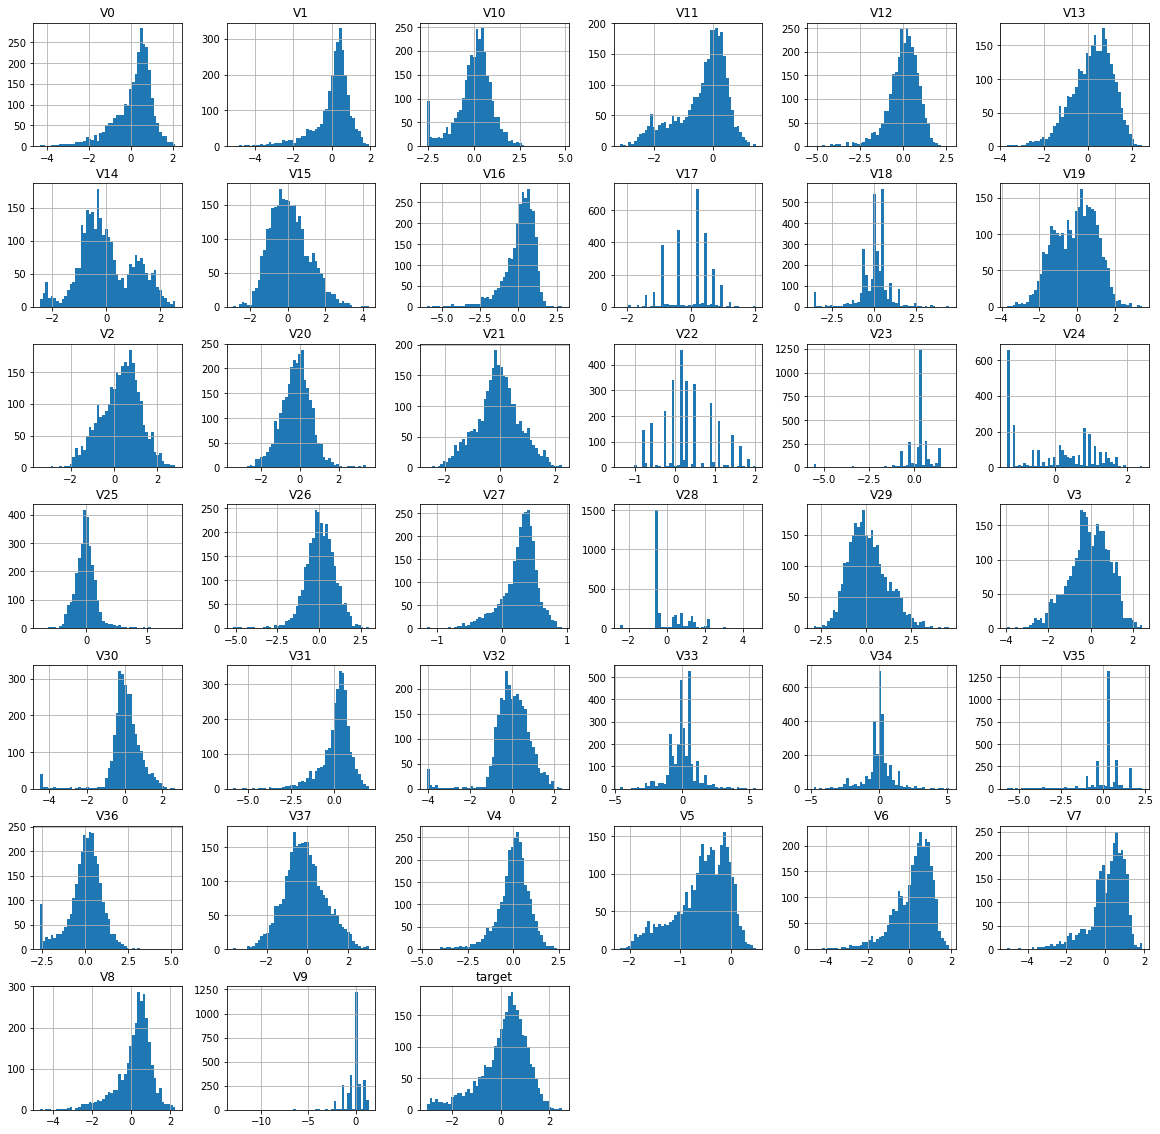

In [25]:
hist = data_train.hist(bins = 50, figsize=(20,20))

In [16]:
#X_train_after_fea.drop('target', axis=1)
X_y_train_afert_fea = pd.concat([X_train_after_fea, y_train], axis=1)

In [17]:
X_y_train_afert_fea.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V34*V35,V34*V36,V34*V37,V35*V35,V35*V36,V35*V37,V36*V36,V36*V37,V37*V37,target
836,1.575775,1.690834,1.219741,2.037514,2.431795,-0.176525,0.869290,0.707879,1.870444,-0.244422,...,-0.311192,0.108141,-0.091743,1.387387,-0.482126,0.409016,0.167542,-0.142136,0.120582,1.901
2406,-1.381489,-0.961146,1.590180,-0.534030,-1.772980,0.934252,1.267561,0.861482,-0.248464,0.217989,...,0.907678,-1.353565,1.508036,0.530681,-0.791372,0.881685,1.180125,-1.314803,1.464851,-0.454
280,0.986687,0.789902,1.534891,0.263999,0.501679,-2.062896,0.986234,0.615717,0.895271,0.217989,...,-0.010647,0.017744,0.074705,0.028656,-0.047758,-0.201073,0.079595,0.335109,1.410878,1.052
937,-0.035617,0.225628,-0.109417,0.618910,-0.090401,-0.281756,-0.563824,-0.457385,-0.060670,-1.167105,...,-3.840355,-0.898283,0.770368,2.299579,0.537886,-0.461291,0.125815,-0.107899,0.092534,-0.250
2755,0.527672,0.146228,0.966516,0.191357,-0.120507,0.589327,0.478742,0.216349,0.536652,0.217989,...,0.017123,0.119159,-0.143405,0.028656,0.199421,-0.240000,1.387795,-1.670185,2.010037,0.512


### 由协方差矩阵获得特征重要度
feature_order_by_corr 为经过排序后的特征顺序

In [80]:
def getFeatureListbyCorr(data):
    #sorted by corr
    #return 
    if os.path.exists(dump_path+'feature_order_by_corr.pkl'):
        return pickle.load(open(dump_path+'feature_order_by_corr.pkl', 'rb'))
    featureCorr = data.corr()['target'].agg('abs').sort_values(ascending = False)[1:]
    return list(featureCorr.index)

In [18]:
feature_order_by_corr = getFeatureListbyCorr(X_y_train_afert_fea)

In [81]:
feature_order_by_corr

['V0',
 'V1',
 'V8',
 'V27',
 'V31',
 'V2',
 'V4',
 'V12',
 'V37',
 'V1*V37',
 'V1*V1',
 'V16',
 'V3',
 'V27*V37',
 'V0*V1',
 'V1*V8',
 'V1*V27',
 'V0*V0',
 'V8*V37',
 'V20',
 'V0*V37',
 'V27*V27',
 'V8*V8',
 'V8*V27',
 'V0*V8',
 'V1*V20',
 'V2*V27',
 'V1*V31',
 'V0*V27',
 'V6*V27',
 'V2*V8',
 'V0*V20',
 'V8*V31',
 'V31*V37',
 'V6*V8',
 'V27*V31',
 'V0*V31',
 'V0*V12',
 'V10',
 'V1*V12',
 'V16*V27',
 'V1*V6',
 'V1*V2',
 'V2*V31',
 'V27*V29',
 'V6*V31',
 'V6',
 'V8*V16',
 'V0*V4',
 'V31*V31',
 'V37*V37',
 'V29*V31',
 'V1*V4',
 'V12*V12',
 'V16*V29',
 'V16*V31',
 'V2*V25',
 'V8*V20',
 'V20*V27',
 'V2*V16',
 'V8*V29',
 'V4*V12',
 'V36*V36',
 'V16*V16',
 'V5',
 'V6*V16',
 'V10*V10',
 'V7*V27',
 'V2*V29',
 'V2*V6',
 'V10*V36',
 'V15*V27',
 'V16*V25',
 'V36',
 'V10*V31',
 'V7*V31',
 'V7*V8',
 'V20*V37',
 'V4*V4',
 'V15*V16',
 'V2*V2',
 'V6*V6',
 'V1*V3',
 'V1*V16',
 'V12*V20',
 'V8*V12',
 'V15*V31',
 'V12*V37',
 'V7*V16',
 'V6*V7',
 'V0*V6',
 'V7*V7',
 'V6*V37',
 'V9*V27',
 'V31*V36',
 'V9*V

In [137]:
# 保存起来
pickle.dump(feature_order_by_corr, open(dump_path+'feature_order_by_corr.pkl', 'wb'))

### 使用Xgboost 获得特征重要度
feature_order_by_xgboost

In [26]:
import xgboost as xgb

In [20]:
all_feature_list = list(X_train_after_fea.columns)

In [41]:
#xg_train = xgb.DMatrix(X_train_after_fea[all_feature_list].values, y_train.values)
#xg_val = xgb.DMatrix(X_val_after_fea[all_feature_list].values, y_val.values)
xgb_model_with_all_features= xgb.XGBRegressor(max_depth=8,
                                             learning_rate=0.1,
                                             n_estimators= 100,
                                             objective='reg:linear',
                                             colsample_bytree='0.7',
                                             random_state=1
                                             )

xgb_model_with_all_features.fit(X_train_after_fea,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree='0.7', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [43]:
feature_importances_xgb = xgb_model_with_all_features.feature_importances_

In [70]:
feature_order_by_xgb = list(pd.DataFrame(feature_importances_xgb, index= X_train_after_fea.columns)\
.sort_values(by = 0, ascending= False).index)

In [101]:
pickle.dump(feature_order_by_xgb, open(dump_path+'feature_order_by_xgb.pkl', 'wb'))

In [75]:

def get_feature_order_by_corr_and_xgb(num):
    feature_order_by_corr_and_xgb = []
    for i in range(num):
        if feature_order_by_xgb[i] in feature_order_by_corr[:num]:
            feature_order_by_corr_and_xgb.append(feature_order_by_xgb[i])
    return feature_order_by_corr_and_xgb


In [76]:
feature_order_by_corr_and_xgb = get_feature_order_by_corr_and_xgb(100)
feature_order_by_corr_and_xgb

['V0',
 'V1',
 'V2',
 'V3',
 'V5',
 'V4',
 'V6',
 'V10',
 'V7',
 'V8',
 'V0*V1',
 'V20',
 'V2*V2',
 'V0*V3',
 'V0*V27',
 'V27',
 'V0*V0',
 'V1*V3',
 'V37',
 'V12',
 'V36',
 'V4*V4',
 'V16',
 'V0*V8',
 'V1*V2',
 'V10*V10',
 'V2*V15',
 'V16*V16',
 'V0*V20',
 'V31',
 'V0*V37',
 'V1*V1',
 'V27*V27',
 'V31*V36',
 'V0*V12',
 'V2*V27',
 'V8*V8',
 'V4*V12',
 'V36*V36',
 'V0*V4',
 'V8*V31']

41

In [43]:
from sklearn.model_selection import train_test_split
def split_val_data(data_train, featList, featNums, val_size):
    # data_trian 做过特征工程的数据
    # featureList 特征列表，根据特征相关度排序
    # featNums 取多少维特征，int, 需小于featureList的大小
    # val_size 验证集的大小--占训练集的比例，float
    data_train_X = data_train[featList[:featNums]];
    data_train_y = data_train['target']
    X_train,y_train,X_val, y_val = train_test_split(data_train_X, data_train_y,test_size = 0.3, random_state = 22)
    return X_train,y_train,X_val, y_val

----
## 取前200维特征进行模型训练

In [85]:
X_train_final = X_train_after_fea[feature_order_by_xgb[:200]]
X_val_final = X_val_after_fea[feature_order_by_xgb[:200]]

In [86]:
X_val_final.head()

,V0,V1,V2,V3,V5,V4,V6,V10,V7,V8,...,V20*V21,V30*V34,V19*V30,V7*V7,V6*V6,V14*V37,V6*V10,V17*V21,V6*V13,V0*V11
1851,-0.153864,-0.266655,-0.403556,-0.293272,0.450967,0.171631,0.009863,0.089270,-0.076026,-0.628578,...,-0.446900,-0.009541,-0.039860,0.005780,0.000097,0.064101,0.000880,1.259441,0.006101,0.017054
757,-0.143114,-0.207370,0.520883,1.366090,-2.228539,0.264178,1.115314,-0.487903,1.193053,0.111287,...,-0.562821,-2.028164,0.208161,1.423375,1.243925,0.175911,-0.544164,0.119751,-0.389315,0.346723
620,-0.175364,0.166343,0.052029,1.410713,-0.240833,0.206196,0.074954,0.504792,0.290503,-0.191899,...,0.026931,-0.002634,0.105095,0.084392,0.005618,-0.253770,0.037836,0.047109,0.007135,-0.006349
2691,0.266452,0.424659,-0.695485,-1.228285,0.645840,0.515059,0.028618,0.039531,-0.231748,0.127125,...,0.147504,0.168616,0.799940,0.053707,0.000819,-0.243624,0.001131,0.151492,-0.022579,0.092050
301,-0.734352,-0.743059,-0.378123,-0.177044,0.028092,-0.090401,0.530594,1.736853,0.364656,-0.321998,...,-1.406078,0.081817,0.308469,0.132974,0.281530,-0.418585,0.921564,0.291065,-0.476699,-0.705333


## 支持向量机 测试

In [82]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
paras = {'kernel':['rbf','poly'],'degree':[2,3,4],'C':[0.1,0.3,1,3]}
svr_cv = GridSearchCV(estimator=svr, param_grid=paras, cv = 5, n_jobs=-1)
#svr.fit(data_features,data_target)
svr_cv.fit(X_train_final,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf', 'poly'], 'degree': [2, 3, 4], 'C': [0.1, 0.3, 1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
# 保存最好的模型
svr_best = svr_cv.best_estimator_
pickle.dump(svr_best, open(dump_path+'svr_cv_best.pkl', 'wb'))

In [90]:
# 用最好的模型预测， 效果并不理想
from sklearn.metrics import mean_squared_error
svr_best_rs = svr_best.predict(X_val_final)

print("验证集MSE为: ",mean_squared_error(svr_best_rs, y_val))


#pd.DataFrame(svr_best).to_csv("svr_cv_best.txt", header= None, index =False)


验证集MSE为:  0.21407276342364168


### 相关性 检验

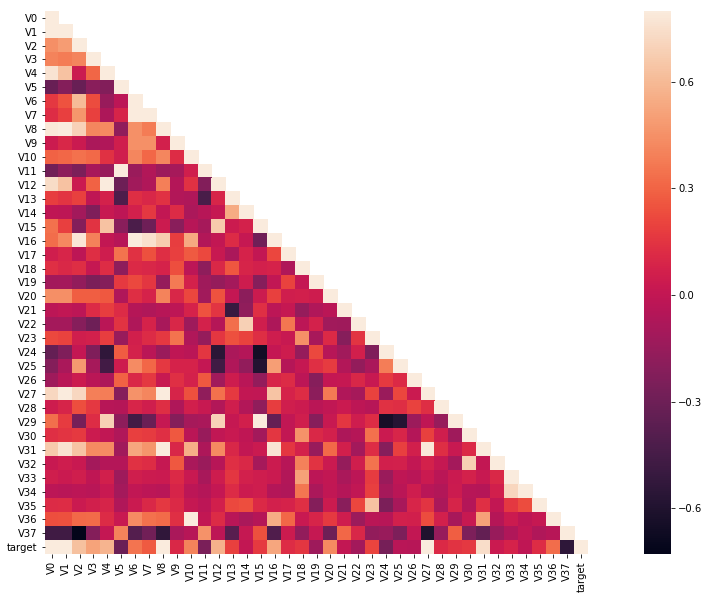

In [10]:
corrMatt = dataWithoutOutliers.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax = 0.8, square=True,annot=False)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


((array([-3.49169764, -3.24730884, -3.11212597, ...,  3.11212597,
          3.24730884,  3.49169764]),
  array([-3.044, -3.028, -3.024, ...,  2.441,  2.503,  2.538])),
 (0.9587049726278101, 0.12635283933517988, 0.973435115321679))

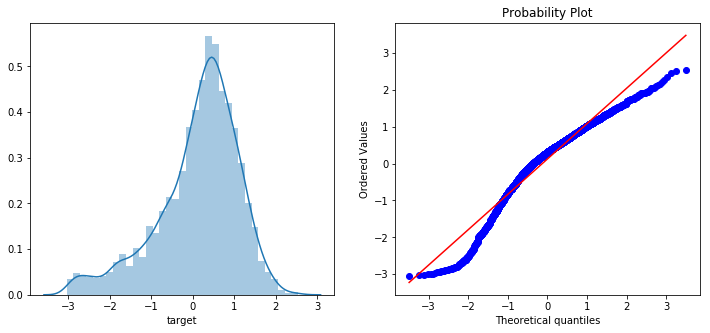

In [14]:
from scipy import stats
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12,5)
sns.distplot(data_target, ax= axes[0])
stats.probplot(data_target, dist = 'norm', fit = True, plot = axes[1])

## RandomForestRegressor with default settings

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr_default = RandomForestRegressor()
rfr_default.fit(data_features, data_target)
data_test_target = rfr_default.predict(data_test)
simpleRandomForestRegressor = pd.DataFrame(data_test_target).to_csv('simpleRandomForestRegressor.txt' , index =False, header=0)

## RandomForestRegressor with
`n_estimators = 50`

`max_depth=20`

`maxfeatures = 0.7`

In [21]:
rfr_1 = RandomForestRegressor(n_estimators = 50, max_depth= 20, max_features = 0.7, n_jobs = -1);
rfr_1.fit(data_features,data_target);
rfr_1_target = rfr_1.predict(data_test)

In [23]:
pd.DataFrame(rfr_1_target).to_csv('rfr_1.txt' , index =False, header=0)

## RandomForestRegressor with gridsearchCV

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# 设置参数词典
paras={'n_estimators':[10,20,50,100,200],
      'max_depth':[3,5,8,10],
      'max_features':[0.5,0.6,0.7,0.8]}

rfr=RandomForestRegressor()

rfr_cv=GridSearchCV(estimator=rfr,param_grid=paras,cv=5,n_jobs=-1)

rfr_cv.fit(X_train_final,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [3, 5, 8, 10], 'max_features': [0.5, 0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
#网格搜索获得的最优模型为：max_depth=20，max_depth=20，n_estimators=200
rfr_cv_best = rfr_cv.best_estimator_
pickle.dump(rfr_cv_best, open(dump_path+'rfr_cv_best.pkl','wb'))

In [95]:
#最优参数
rfr_cv.best_params_

{'max_depth': 10, 'max_features': 0.6, 'n_estimators': 200}

In [96]:
# 使用最优参数预测模型 , 感觉还不错
rfr_cv_best_result = rfr_cv_best.predict(X_val_final)
print("最优随机森林验证集MSE:", mean_squared_error(rfr_cv_best_result,y_val))

最优随机森林验证集MSE: 0.11424879948602709


### 使用去除3sigma之外的数据试试

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# 设置参数词典
paras={'n_estimators':[10,20,50,100,200],
      'max_depth':[10,20,30],
      'max_features':[0.5,0.6,0.7,0.8]}
# 设置模型
rfr=RandomForestRegressor()
# cv=5意思是进行5折交叉验证
rfr_cv=GridSearchCV(estimator=rfr,param_grid=paras,cv=5,n_jobs=-1)
# 整个训练两分多钟
rfr_cv.fit(dataWithoutOutliers_features,dataWithoutOutliers_target)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [10, 20, 30], 'max_features': [0.5, 0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
rfr_best_dropeddata = rfr_cv.best_estimator_.predict(data_test)
pd.DataFrame(rfr_best_dropeddata).to_csv("rfr_best_dropeddata.txt",header=None,index = False)

array([ 0.37708925,  0.20936013, -0.04129668, ..., -2.312575  ,
       -2.385945  , -2.36979   ])

In [43]:
# 保存模型
from sklearn.externals import joblib
joblib.dump(rfr_cv.best_estimator_,'rfr_best_dropeddata.m')

# 模型本地调回
rfr_best_dropeddata_2 = joblib.load('rfr_best_dropeddata.m')

pd.DataFrame(rfr_best_dropeddata_2.predict(data_test)).to_csv("rfr_best_dropeddata_2.txt",header=None,index = False)

## Xgboost + CV交叉

In [98]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
paras = {'max_depth':[2,4,6,8],
         'n_estimators':[50,100,200],
         "objective":['reg:linear'],
        "colsample_bytree":[0.6,0.7]}
xgb_cv = GridSearchCV(estimator= xgb_model, param_grid=paras, cv=5,n_jobs=-1)
print('training start')
xgb_cv.fit(X_train_final,y_train)
print('training over')

training start
training over


In [100]:
# 保存模型
xgb_cv_best = xgb_cv.best_estimator_
pickle.dump(xgb_cv_best,open(dump_path+'xgb_cv_best.pkl', 'wb'))
# 验证集得分   好像越来约好了？
xgb_cv_best_rs = xgb_cv_best.predict(X_val_final)
print('xgb验证集MSE:', mean_squared_error(xgb_cv_best_rs, y_val))
#pd.DataFrame(xgb_best_predict).to_csv('xgb_best.txt', index= False, header=0)

xgb验证集MSE: 0.10907208835439396


### 试试最简单的线性回归

In [116]:
from sklearn.linear_model import Ridge
paras = {'alpha':[0.1,0.3,1,3,10]}
lr_model = Ridge()
lr_cv = GridSearchCV(lr_model, param_grid= paras, cv = 5, n_jobs=-1)
lr_cv.fit(X_train_final, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.1, 0.3, 1, 3, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [117]:
lr_cv_best = lr_cv.best_estimator_
pickle.dump(lr_cv_best, open('models/lr_cv_best.pkl', 'wb'))

In [121]:
# 擦  怀疑人生
lr_cv_best_rs = lr_cv_best.predict(X_val_final)
print('线性回归MSE:', mean_squared_error(lr_cv_best_rs, y_val))

线性回归MSE: 0.11529981115441602


## 用神经网络

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [139]:
nn_model = Sequential()
nn_model.add(Dense(32, activation='relu', input_shape=(200,)))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))
#nn_model.add(Dense(64, activation='relu'))
#nn_model.add(Dropout(0.5))
nn_model.add(Dense(1))
nn_model.compile(loss="mse", optimizer='adam',metrics=['mse'])

In [140]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                6432      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________


In [146]:
nn = nn_model.fit(X_train_final, y_train, epochs=200, verbose = 1,
                            validation_data=(X_val_final,y_val))

Train on 2310 samples, validate on 578 samples
Epoch 1/200
2310/2310 [==============================] - 0s 47us/step - loss: 0.2118 - mean_squared_error: 0.2118 - val_loss: 0.2337 - val_mean_squared_error: 0.2337
Epoch 2/200
2310/2310 [==============================] - 0s 51us/step - loss: 0.2022 - mean_squared_error: 0.2022 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 3/200
2310/2310 [==============================] - 0s 61us/step - loss: 0.1888 - mean_squared_error: 0.1888 - val_loss: 0.2434 - val_mean_squared_error: 0.2434
Epoch 4/200
2310/2310 [==============================] - 0s 53us/step - loss: 0.1913 - mean_squared_error: 0.1913 - val_loss: 0.2410 - val_mean_squared_error: 0.2410
Epoch 5/200
2310/2310 [==============================] - 0s 56us/step - loss: 0.1944 - mean_squared_error: 0.1944 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 6/200
2310/2310 [==============================] - 0s 57us/step - loss: 0.2007 - mean_squared_error: 0.2007 - val_los

Epoch 50/200
2310/2310 [==============================] - 0s 63us/step - loss: 0.1962 - mean_squared_error: 0.1962 - val_loss: 0.2338 - val_mean_squared_error: 0.2338
Epoch 51/200
2310/2310 [==============================] - 0s 64us/step - loss: 0.1817 - mean_squared_error: 0.1817 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 52/200
2310/2310 [==============================] - 0s 61us/step - loss: 0.1881 - mean_squared_error: 0.1881 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 53/200
2310/2310 [==============================] - 0s 59us/step - loss: 0.1917 - mean_squared_error: 0.1917 - val_loss: 0.2093 - val_mean_squared_error: 0.2093
Epoch 54/200
2310/2310 [==============================] - 0s 55us/step - loss: 0.1782 - mean_squared_error: 0.1782 - val_loss: 0.2441 - val_mean_squared_error: 0.2441
Epoch 55/200
2310/2310 [==============================] - 0s 56us/step - loss: 0.1790 - mean_squared_error: 0.1790 - val_loss: 0.2093 - val_mean_squared_error: 0.209

2310/2310 [==============================] - 0s 52us/step - loss: 0.1768 - mean_squared_error: 0.1768 - val_loss: 0.2369 - val_mean_squared_error: 0.2369
Epoch 100/200
2310/2310 [==============================] - 0s 58us/step - loss: 0.1641 - mean_squared_error: 0.1641 - val_loss: 0.2202 - val_mean_squared_error: 0.2202
Epoch 101/200
2310/2310 [==============================] - 0s 66us/step - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 102/200
2310/2310 [==============================] - 0s 60us/step - loss: 0.1757 - mean_squared_error: 0.1757 - val_loss: 0.1811 - val_mean_squared_error: 0.1811
Epoch 103/200
2310/2310 [==============================] - 0s 57us/step - loss: 0.1682 - mean_squared_error: 0.1682 - val_loss: 0.2394 - val_mean_squared_error: 0.2394
Epoch 104/200
2310/2310 [==============================] - 0s 53us/step - loss: 0.1875 - mean_squared_error: 0.1875 - val_loss: 0.2357 - val_mean_squared_error: 0.2357
Epoch 

Epoch 148/200
2310/2310 [==============================] - 0s 51us/step - loss: 0.1668 - mean_squared_error: 0.1668 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 149/200
2310/2310 [==============================] - 0s 55us/step - loss: 0.1852 - mean_squared_error: 0.1852 - val_loss: 0.1919 - val_mean_squared_error: 0.1919
Epoch 150/200
2310/2310 [==============================] - 0s 55us/step - loss: 0.1701 - mean_squared_error: 0.1701 - val_loss: 0.2372 - val_mean_squared_error: 0.2372
Epoch 151/200
2310/2310 [==============================] - 0s 54us/step - loss: 0.1664 - mean_squared_error: 0.1664 - val_loss: 0.2359 - val_mean_squared_error: 0.2359
Epoch 152/200
2310/2310 [==============================] - 0s 52us/step - loss: 0.1693 - mean_squared_error: 0.1693 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 153/200
2310/2310 [==============================] - 0s 55us/step - loss: 0.1550 - mean_squared_error: 0.1550 - val_loss: 0.2235 - val_mean_squared_error:

Epoch 197/200
2310/2310 [==============================] - 0s 49us/step - loss: 0.1633 - mean_squared_error: 0.1633 - val_loss: 0.2091 - val_mean_squared_error: 0.2091
Epoch 198/200
2310/2310 [==============================] - 0s 55us/step - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 199/200
2310/2310 [==============================] - 0s 56us/step - loss: 0.1605 - mean_squared_error: 0.1605 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 200/200
2310/2310 [==============================] - 0s 52us/step - loss: 0.1692 - mean_squared_error: 0.1692 - val_loss: 0.2148 - val_mean_squared_error: 0.2148


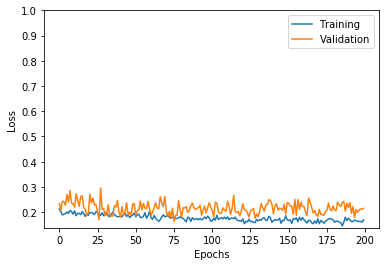

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    plt.ylim(ymax =1)

plot_history(nn)

---------
## 数据提交测试

In [107]:
# 读取 test集
data_test = pd.read_table("data/zhengqi_test.txt")
X_test = data_test[feature_list]
#y_test = data_test['target']
# 造特征
X_test_all = feature_eng(X_test)
X_test_final = X_test_all[feature_order_by_xgb[:200]]

In [108]:
print(X_test.shape)
print(X_test_all.shape)
print(X_test_final.shape)

(1925, 38)
(1925, 779)
(1925, 200)


In [109]:
def make_final_sub(modelname, X_test,savename):
    result =  modelname.predict(X_test)
    pd.DataFrame(result).to_csv('submit/'+savename, index= False, header=0)

In [110]:
# 使用随机森林
make_final_sub(rfr_cv_best,X_test_final,"rfr_best_with_200fea.txt")

In [111]:
# 使用Xgboost
make_final_sub(xgb_cv_best,X_test_final,"xgb_best_with_200fea.txt")

In [32]:
x = pd.read_table('svr_cv_best.txt', header=None)
x.head()


,0
0,0.484293
1,0.406388
2,0.124808
3,0.327249
4,0.509518


In [112]:
y=pd.read_table('submit/xgb_best_with_200fea.txt',header=None)
y.shape

(1925, 1)

In [113]:
y.head()

,0
0,0.409537
1,0.253117
2,0.076342
3,0.235159
4,0.411064
